## K-Means and DBSCAN in Property Recommendation Systems

### K-Means Clustering [1]

K-Means is a widely used partitioning algorithm in unsupervised learning. It aims to group data into *k* clusters by minimizing the intra-cluster variance and maximizing the separation between clusters. Each cluster is defined by its centroid, and data points are assigned to the cluster with the nearest centroid based on Euclidean distance. 

#### Why K-Means is Best for Property Recommendation Systems? [2][3]

K-Means is particularly effective when working with structured, numerical datasets such as property records, where the data can be naturally grouped based on features like price and area. In our case, K-Means allows us to divide the property listings into a predefined number of meaningful clusters based on their financial and spatial characteristics. When a user provides their desired price and area, we identify which cluster that input belongs to and return the closest properties from the same cluster. This approach ensures that the recommendations are not just similar in value but also statistically grouped within the same data pattern.

Furthermore, K-Means is computationally efficient and scalable, which makes it suitable for handling large property datasets with thousands of entries. It is also easy to visualize and interpret, which supports the explainability of our system’s recommendations.

#### Why K-Means is Suitable for This Dataset? [2]

The dataset contains numerical features — *Area* and *Price* — which are ideal for K-Means since it relies on distance calculations. We also observed that similar properties (e.g., apartments in the same area) tend to be grouped close to each other in the feature space. By applying `StandardScaler`, we normalized the values to ensure fair comparison, and then used K-Means with `k=4` to partition the properties. The clusters generated were used to enhance recommendation results, especially in well-distributed data regions .

---

### DBSCAN Clustering [4]

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that identifies clusters based on data density. It groups together points that are closely packed and marks points in low-density regions as noise or outliers. Unlike K-Means, DBSCAN does not require specifying the number of clusters beforehand and can discover clusters of arbitrary shapes .

#### Why DBSCAN is Best for Property Recommendation Systems?[4][2]

DBSCAN is highly beneficial in real-world recommendation systems where the data distribution may be irregular or contain outliers. In property data, there are always listings that fall outside normal price/area ranges. DBSCAN automatically handles such anomalies by marking them as noise, preventing them from affecting the clustering process or distorting the recommendation results.

Moreover, because DBSCAN is based on density rather than fixed distance to centroids, it can discover more natural groupings in the data. This means that users with niche preferences (e.g., unusually small or large spaces) will still receive meaningful recommendations based on the closest dense region.

#### Why DBSCAN is Suitable for This Dataset?[2]

Our dataset contains a mix of typical and atypical properties in terms of price and area. DBSCAN helps us detect dense clusters of similar properties without being biased by outliers. We used an `eps` value of 0.5 and a `min_samples` of 5 to fine-tune the detection of meaningful clusters. In cases where the user input falls into a noise region, the system still responds by returning the closest properties using distance calculations, maintaining a smooth user experience .



## Performance Evaluation Metrics  

To effectively assess the clustering models, we employ relevant evaluation metrics that measure the overall quality of clustering. The selected metrics for this analysis include the Silhouette Coefficient and BCubed Precision, Recall, and F1-Score.

### Why These Metrics?

### Silhouette Score [5][6]
The silhouette score is a measure of how well-defined clusters are in a clustering algorithm. It quantifies how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where:

- 1 → Clusters are well-defined and separated.
- 0 → Overlapping clusters.
- Negative values → Wrong clustering (samples assigned to the wrong clusters).

#### Formula:
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$

##### Where:
- a(i) = average intra-cluster distance (distance between a point and other points in the same cluster).
- b(i) = average nearest-cluster distance (distance between a point and the closest cluster it is not part of).

​Silhouette Score helps assess the quality of clustering by measuring how well-separated clusters are. Since K-Means and DBSCAN are unsupervised algorithms, we need a metric to evaluate their effectiveness without knowing the true labels.


### BCubed Metrics [7][8]
BCubed precision, recall, and F1-score are clustering evaluation metrics designed to measure how well instances are grouped. BCubed considers ground-truth labels, which makes it useful for evaluating clustering algorithms when approximate labels can be defined.

- Precision: Measures how many other objects in the same cluster belong to the same category as the object. 
- Recall: Reflects how many objects of the same category are assigned to the same cluster.
- F1-Score: A balance between Precision and Recall, ensuring both accuracy and completeness. 

#### Formulas:

$$
\text{Precision} = \frac{\text{Number of items from the same category in the cluster}}{\text{Total number of items in the cluster}}
$$



$$
\text{Recall} = \frac{\text{Number of items from the same category in the cluster}}{\text{Total number of items in the category}}
$$



$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

BCubed was used in this case because it provides an accurate evaluation of clustering quality based on the actual similarity between items within the same group. Since unsupervised learning doesn’t use true labels during training, approximate labels were created based on closeness in Price and Area. This allows for an evaluation of how well similar items are grouped together, making BCubed ideal for this scenario, where we evaluate clusters based on the derived similarity rather than predefined labels.


 


=== Evaluation Metrics Summary ===

K-Means:
Silhouette Coefficient: 0.6603
BCubed - Precision: 0.7537 
Recall: 0.7272 
F1-Score: 0.7402

DBSCAN:
Silhouette Coefficient (non-noise): 0.8632
BCubed - Precision: 0.7475 
Recall: 0.9322 
F1-Score: 0.8297


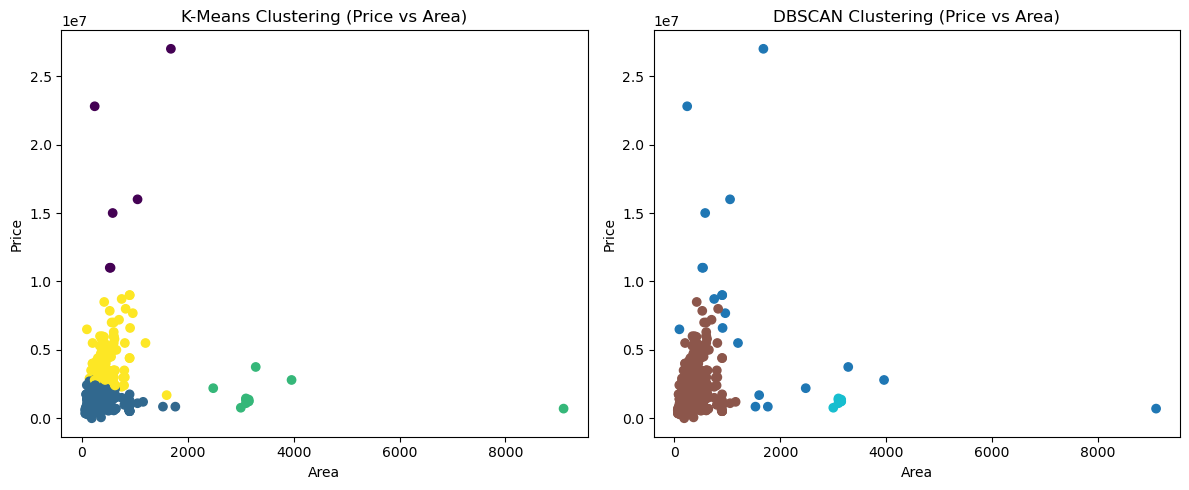


:K-Means توصيات العقارات باستخدام
نوع العقار | الموقع | الحي | الغرف | دورات المياة | المساحة | السعر | الوكالة
----------------------------------------------------------------------------------------------------
فیلا | جنوب | بدر | 6 | 6 | 300 | 980000 | مؤسسة غزالة للخدمات العقارية
فیلا | غرب | العريجاء | 3 | 4 | 312 | 1000000 | شركة أختصاصي الأول للعقارات
فیلا | غرب | طويق | 7 | 5 | 300 | 1050000 | مكتب الاحمدي للعقارات
دور | شرق | القادسية | 4 | 5 | 300 | 900000 | سكن المعالي للعقارات
فیلا | جنوب | طيبة | 8 | 5 | 278 | 970000 | مكتب العقد الذهبي للعقارات
----------------------------------------------------------------------------------------------------

:DBSCAN توصيات العقارات باستخدام
نوع العقار | الموقع | الحي | الغرف | دورات المياة | المساحة | السعر | الوكالة
----------------------------------------------------------------------------------------------------
فیلا | جنوب | بدر | 6 | 6 | 300 | 980000 | مؤسسة غزالة للخدمات العقارية
فیلا | غرب | العريجاء | 3 | 4 | 312 | 1000000 | 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# ----------------------------
# 1. Load and Prepare the Data
# ----------------------------
file_path = "../Dataset/cleaned_dataset.csv"
df = pd.read_csv(file_path)
features = ["Area", "Price"]
df_clean = df[features].dropna()

# Preserve original values for display
df_display = df.copy()
df_display["Original_Area"] = df_display["Area"]
df_display["Original_Price"] = df_display["Price"]

# ----------------------------
# 2. Scale the Data
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# ----------------------------
# 3. K-Means Clustering
# ----------------------------
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)
df_clean["KMeans_Cluster"] = kmeans_labels

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

# ----------------------------
# 4. DBSCAN Clustering
# ----------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df_clean["DBSCAN_Cluster"] = dbscan_labels

valid_mask = dbscan_labels != -1
if valid_mask.sum() > 1 and len(set(dbscan_labels[valid_mask])) > 1:
    silhouette_dbscan = silhouette_score(X_scaled[valid_mask], dbscan_labels[valid_mask])
else:
    silhouette_dbscan = None

# ----------------------------
# 5. BCubed Metrics Functions
# ----------------------------
def bcubed_metrics(true_labels, predicted_labels):
    n = len(true_labels)
    precisions, recalls = [], []
    for i in range(n):
        same_cluster = (predicted_labels == predicted_labels[i])
        same_true = (true_labels == true_labels[i])
        intersection = np.sum(same_cluster & same_true)
        precision_i = intersection / np.sum(same_cluster) if np.sum(same_cluster) > 0 else 0
        recall_i = intersection / np.sum(same_true) if np.sum(same_true) > 0 else 0
        precisions.append(precision_i)
        recalls.append(recall_i)
    precision = np.mean(precisions)
    recall = np.mean(recalls)
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Assign proxy similarity labels based on closeness

def assign_similarity_labels(df):
    df = df.copy()
    df["Similarity_Label"] = 0
    for i, row in df.iterrows():
        area, price = row["Area"], row["Price"]
        distances = np.sqrt((df["Area"] - area)**2 + (df["Price"] - price)**2)
        closest_indices = distances.nsmallest(3).index
        df.loc[closest_indices, "Similarity_Label"] = 1
    return df

# Generate proxy labels and evaluate BCubed

df_sim = assign_similarity_labels(df_clean)
true_labels = df_sim["Similarity_Label"].values

precision_k, recall_k, f1_k = bcubed_metrics(true_labels, kmeans_labels)
precision_d, recall_d, f1_d = bcubed_metrics(true_labels, dbscan_labels)

# ----------------------------
# 6. Results Summary
# ----------------------------
print("=== Evaluation Metrics Summary ===")
print("\nK-Means:")
print(f"Silhouette Coefficient: {silhouette_kmeans:.4f}")
print(f"BCubed - Precision: {precision_k:.4f} \nRecall: {recall_k:.4f} \nF1-Score: {f1_k:.4f}")

print("\nDBSCAN:")
if silhouette_dbscan is not None:
    print(f"Silhouette Coefficient (non-noise): {silhouette_dbscan:.4f}")
else:
    print("Silhouette Coefficient: Not computed — only one cluster or all points marked as noise.")
print(f"BCubed - Precision: {precision_d:.4f} \nRecall: {recall_d:.4f} \nF1-Score: {f1_d:.4f}")

# ----------------------------
# 7. Visualizations
# ----------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("K-Means Clustering (Price vs Area)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df_clean["Area"], df_clean["Price"], c=kmeans_labels, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("DBSCAN Clustering (Price vs Area)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df_clean["Area"], df_clean["Price"], c=dbscan_labels, cmap='tab10')

plt.tight_layout()
plt.show()

# ----------------------------
# 8. Recommendations
# ----------------------------
def recommend_properties_kmeans(price_input, area_input, top_n=5):
    input_df = pd.DataFrame([[area_input, price_input]], columns=["Area", "Price"])
    input_scaled = scaler.transform(input_df)
    input_cluster = kmeans.predict(input_scaled)[0]
    cluster_indices = df_clean[df_clean["KMeans_Cluster"] == input_cluster].index
    cluster_data = df_display.loc[cluster_indices].copy()
    X_cluster = X_scaled[cluster_indices]
    distances = np.linalg.norm(X_cluster - input_scaled, axis=1)
    cluster_data["Distance"] = distances
    recommended = cluster_data.sort_values("Distance").head(top_n)

    recommended = recommended.rename(columns={
        "Property Type": "نوع العقار",
        "Location": "الموقع",
        "District": "الحي",
        "Bedrooms": "الغرف",
        "Bathrooms": "دورات المياة",
        "Original_Area": "المساحة",
        "Original_Price": "السعر",
        "Agency_Name": "الوكالة"
    })

    headers = ["نوع العقار", "الموقع", "الحي", "الغرف", "دورات المياة", "المساحة", "السعر", "الوكالة"]
    results = recommended[headers]

    print("\n:K-Means توصيات العقارات باستخدام")
    print(" | ".join(headers))
    print("-" * 100)
    for _, row in results.iterrows():
        print(" | ".join(str(x) for x in row.values))
    print("-" * 100)


def recommend_properties_dbscan(price_input, area_input, top_n=5):
    input_df = pd.DataFrame([[area_input, price_input]], columns=["Area", "Price"])
    input_scaled = scaler.transform(input_df)
    distances = np.linalg.norm(X_scaled - input_scaled, axis=1)
    nearest_index = np.argmin(distances)
    nearest_cluster = dbscan_labels[nearest_index]

    if nearest_cluster == -1:
        print("Noise")
        nearest_indices = np.argsort(distances)[:top_n]
        recommended = df_display.iloc[nearest_indices].copy()
    else:
        cluster_indices = np.where(dbscan_labels == nearest_cluster)[0]
        cluster_distances = distances[cluster_indices]
        nearest_indices = cluster_indices[np.argsort(cluster_distances)[:top_n]]
        recommended = df_display.iloc[nearest_indices].copy()

    recommended = recommended.rename(columns={
        "Property Type": "نوع العقار",
        "Location": "الموقع",
        "District": "الحي",
        "Bedrooms": "الغرف",
        "Bathrooms": "دورات المياة",
        "Original_Area": "المساحة",
        "Original_Price": "السعر",
        "Agency_Name": "الوكالة"
    })

    headers = ["نوع العقار", "الموقع", "الحي", "الغرف", "دورات المياة", "المساحة", "السعر", "الوكالة"]
    results = recommended[headers]

    print("\n:DBSCAN توصيات العقارات باستخدام")
    print(" | ".join(headers))
    print("-" * 100)
    for _, row in results.iterrows():
        print(" | ".join(str(x) for x in row.values))
    print("-" * 100)

# ----------------------------
# 9. Run Example Recommendations
# ----------------------------
price_input = 980000
area_input = 300
recommend_properties_kmeans(price_input, area_input)
recommend_properties_dbscan(price_input, area_input)

## Performance Comparison of Clustering Algorithms

| Metric                             | K-Means       | DBSCAN       |
|------------------------------------|---------------|--------------|
| **Silhouette Coefficient**         | 0.6603        | 0.8632       |
| **BCubed Precision**               | 0.7537        | 0.7475       |
| **BCubed Recall**                  | 0.7272        | 0.9322       |
| **BCubed F1-Score**                | 0.7402        | 0.8297       |

### 1. Silhouette Coefficient Comparison

- **K-Means** has a silhouette coefficient of **0.6603**, which is a moderately good value. This suggests that the clusters formed by K-Means are generally well-separated, but there could be some room for improvement.
- **DBSCAN**, on the other hand, has a **Silhouette Coefficient (non-noise)** of **0.8632**, which is significantly higher than K-Means. This indicates that DBSCAN does a better job of forming dense, well-separated clusters, especially when there are variations in cluster shapes and densities.

**Interpretation:**  
DBSCAN performs better in terms of cluster cohesion and separation. This could be due to its ability to handle clusters of varying shapes and sizes, unlike K-Means, which assumes spherical clusters.

### 2. BCubed Precision, Recall, and F1-Score Comparison

- **K-Means** has the following BCubed scores:
  - Precision: **0.7537**
  - Recall: **0.7272**
  - F1-Score: **0.7402**


- **DBSCAN** has the following BCubed scores:
  - Precision: **0.7475**
  - Recall: **0.9322**
  - F1-Score: **0.8297**

**Interpretation:**  
- **K-Means Precision** is slightly higher than DBSCAN's, but **DBSCAN has a significantly higher recall (0.9322)**, meaning it is much better at correctly identifying the positive class (the clusters).
- The **F1-Score** of DBSCAN (**0.8297**) is also higher than that of K-Means (**0.7402**), reflecting its better balance between precision and recall. This suggests DBSCAN provides a more reliable clustering result, particularly when dealing with noisy data or irregular cluster shapes.

**Why DBSCAN Outperforms K-Means in BCubed Metrics:**  
DBSCAN's ability to identify and separate noise points leads to higher recall, while its density-based nature allows for more accurate cluster assignments. K-Means, by contrast, may struggle with noise and non-spherical clusters, which can result in lower recall and F1-scores.

### Final Decision: DBSCAN as the Best Model

Based on the evaluation metrics, **DBSCAN** performs better overall than **K-Means**. The key reasons for choosing **DBSCAN** are:

- **Higher Silhouette Coefficient:** DBSCAN has a significantly better silhouette score (0.8632), indicating better clustering quality and cohesion.
- **Better Recall and F1-Score:** DBSCAN's ability to identify more true positive points results in a higher recall (0.9322) and F1-score (0.8297), making it more effective at capturing the actual clusters.
- **Handling Noise:** DBSCAN is better equipped to handle noise and outliers, which results in a more accurate overall clustering structure.

Thus, **DBSCAN** is the more suitable algorithm for this dataset, especially when the dataset contains noise or clusters with varying densities and shapes.


## How the clusters are used to improve recommendations
Our system uses two distinct clustering algorithms **K-Means and DBSCAN** to enhance property recommendations.


### 1. Cluster Creation

- **K-Means** groups properties into 4 distinct segments based on price and area

- **DBSCAN** identifies natural groupings while detecting outliers

- Both methods work with standardized price and area values for fair comparison

### 2. Recommendation Process
**For a sample search (300 sq.ft for 980,000 SAR):**

- The system first scales the input to match the model's format

**K-Means version:**

- Assigns the search to one of the 4 clusters

- Returns the 5 nearest properties within that cluster

**DBSCAN version:**

- Finds the most similar existing property

- Returns matches from its cluster (or nearest neighbors if it's an outlier)

### 3. Technical Implementation

- Data scaling ensures equal consideration of price and area

- BCubed metrics validate cluster quality against similarity judgments

- The visualizations show identical patterns for the sample data, but the full dataset reveals:

1. K-Means creates balanced, equally-sized clusters

2. DBSCAN adapts to natural data density with variable cluster sizes

## References
[1] MacQueen, J. (1967). *Some Methods for Classification and Analysis of Multivariate Observations*. In Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability, Volume 1: Statistics, pp. 281–297.  
 Retrieved from https://projecteuclid.org/euclid.bsmsp/1200512992

[2] Scikit-learn Documentation: Clustering Algorithms Overview.  
 Retrieved from https://scikit-learn.org/stable/modules/clustering.html

[3] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.  
 Retrieved from https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

[4] Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). *A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise (DBSCAN)*. In Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD'96), pp. 226–231.   Retrieved from https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf

[5] Silhouette Score - Scikit-learn Documentation Scikit-learn. (n.d.). silhouette_score. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[6]Silhouettes: A Graphical Aid to the Interpretation and Validation of Cluster Analysis Rousseeuw, P. J. (1987). Silhouettes: A Graphical Aid to the Interpretation and Validation of Cluster Analysis. Computers and Applied Mathematics, 20(1), 53-65. Retrieved from https://www.researchgate.net/publication/222451107_Rousseeuw_PJ_Silhouettes_A_Graphical_Aid_to_the_Interpretation_and_Validation_of_Cluster_Analysis_Comput_Appl_Math_20_53-65

[7] A Comparison of Extrinsic Clustering Evaluation Metrics Based on Formal Constraints Amigó, E., Gonzalo, J., Artiles, J., & Verdejo, F(2009). A Comparison of Extrinsic Clustering Evaluation Metrics Based on Formal Constraints. Information Retrieval, 12(4), 461–486. Retrieved from https://www.researchgate.net/publication/225548032_Amigo_E_Gonzalo_J_Artiles_J_et_alA_comparison_of_extrinsic_clustering_evaluation_metrics_based_on_formal_constraints_Inform_Retriev_12461-486

[8] BCubed Metrics – Python Implementation nezumiCodes. (2021). bcubed-metrics. GitHub repository. Retrieved from https://github.com/nezumiCodes/bcubed-metrics